In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Three Functions for 3 Main Visualizations
Make sure to download the data file, copy the path and paste into read functions

In [15]:
#1) 
def line_plot_1():
    data_temp = pd.read_csv(r"C:\Users\ADMIN\Downloads\Data_File.csv") #Paste new path here, do not remove raw string 
    data = data_temp.set_index('North American Industry Classification System (NAICS)').transpose()
    data.reset_index(inplace=True)
    data.rename(columns={'index': 'Date'}, inplace=True)

    allowed_dates = [
        'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 
        'Apr-23', 'May-23', 'Jun-23', 'Jul-23', 'Aug-23', 'Sep-23', 
        'Oct-23', 'Nov-23', 'Dec-23', 'Jan-24', 'Feb-24', 'Mar-24', 
        'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24', 'Sep-24', 
        'Oct-24', 'Nov-24', 'Dec-24'
    ]
    data = data[data['Date'].isin(allowed_dates)]
    
    industry_cols = data.columns.drop('Date')
    for col in industry_cols:
        data[col] = data[col].str.replace(',', '', regex=True)
        data[col] = pd.to_numeric(data[col], errors='coerce')

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    sns.lineplot(data, x='Date', y='Clothing and clothing accessories retailers  [4581]', color='red',ax=axs[0, 0], label='Clothing & Clothing Accessories').set(
        xlabel='Date', 
        ylabel='Revenue'
    )
    axs[0, 0].set_title('Clothing & Clothing Accessories Retailers')
    axs[0, 0].set_xticks(range(len(data['Date']))) 
    axs[0, 0].set_xticklabels(data['Date'], rotation=45)

    sns.lineplot(data=data, x='Date', y='Shoe retailers  [4582]', ax=axs[0, 1], color='green', label='Shoes').set(
        xlabel='Date', 
        ylabel='Revenue'
    )
    axs[0, 1].set_title('Shoes Retailers')
    axs[0, 1].set_xticks(range(len(data['Date']))) 
    axs[0, 1].set_xticklabels(data['Date'], rotation=45)
    
    sns.lineplot(data, x='Date', y='Jewellery, luggage and leather goods retailers  [4583]', color='blue',ax=axs[1, 0], label='Jewellery, Luggage & Leather Goods').set(
        xlabel='Date', 
        ylabel='Revenue'
    )
    axs[1, 0].set_title('Jewelry, Luggage & Leather Goods Retailers')
    axs[1, 0].set_xticks(range(len(data['Date']))) 
    axs[1, 0].set_xticklabels(data['Date'], rotation=45)

    sns.lineplot(data, x='Date', y='Clothing, clothing accessories, shoes, jewelry, luggage and leather goods retailers  [458]', color='purple',ax=axs[1, 1], label='Industry Total').set(
        xlabel='Date', 
        ylabel='Revenue'
    )
    axs[1, 1].set_title('Total Revenue by Industry')
    axs[1, 1].set_xticks(range(len(data['Date']))) 
    axs[1, 1].set_xticklabels(data['Date'], rotation=45)
    
    axs[0,0].grid(True)
    axs[0,1].grid(True)
    axs[1,0].grid(True)
    axs[1,1].grid(True)
    axs[0,0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    axs[0,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    axs[1,0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    axs[1,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    plt.tight_layout()

#2)
def line_plot_2():
    data_temp = pd.read_csv(r"C:\Users\ADMIN\Downloads\Data_File.csv") #Paste new path here, do not remove raw string 
    data = data_temp.set_index('North American Industry Classification System (NAICS)').transpose()
    data.reset_index(inplace=True)
    data.rename(columns={'index': 'Date'}, inplace=True)

    allowed_dates = [
        'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 
        'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 
        'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 
        'Jul-21', 'Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21',
        'Jan-22'
    ]
    data = data[data['Date'].isin(allowed_dates)]
    
    industry_cols = data.columns.drop('Date')
    for col in industry_cols:
        data[col] = data[col].str.replace(',', '', regex=True)
        data[col] = pd.to_numeric(data[col], errors='coerce')

    drop_percents = {}
    for col in industry_cols:
        peak = data[col].max()
        trough = data[col].min()
        if peak > 0:
            drop = ((peak - trough) / peak) * 100
            drop_percents[col] = drop
            
    top3 = sorted(drop_percents, key=drop_percents.get, reverse=True)[:3]

    fig = plt.figure(figsize=(8,6))
    plot = sns.lineplot(data, x='Date', y='Clothing and clothing accessories retailers  [4581]', color='red', label='Clothing & Clothing Accessories').set(
        title='Retail Business Most Impacted by COVID',
        xlabel='Date', 
        ylabel='Revenue'
    )
    
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    plt.tight_layout()

#3)
def bar_plot():
    data_temp = pd.read_csv(r"C:\Users\ADMIN\Downloads\Data_File.csv") #Paste new path here, do not remove raw string 
    data = data_temp.set_index('North American Industry Classification System (NAICS)').transpose()
    data.reset_index(inplace=True)
    data.rename(columns={'index': 'Date'}, inplace=True)
    
    industry_cols = data.columns.drop('Date')
    for col in industry_cols:
        data[col] = data[col].str.replace(',', '', regex=True)
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    motor_vehicle_col = 'Automobile dealers  [4411]'
    avg_sales_per_month = data.groupby('Date')[motor_vehicle_col].mean()
    top_5_months = avg_sales_per_month.sort_values(ascending=False).head(5)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=top_5_months.index, y=top_5_months.values)

    # Add legend manually using plt
    ax.set_title('Top 5 Months with Highest Average Sales (2019-2024)')
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Sales')
    ax.legend(['Top 5 Months by Average Sales'], loc='upper right')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    plt.tight_layout()
    plt.ylim(15000000, 17500001)

# A Glimpse of the Data
This is data of Canada's monthly retail trade sales by industry from 2019 to 2024 by thousands (Feb 2025, Statistic Canada).
### Table Features
After cleaning and modelling, the table contains 31 columns, 29 of which are industries and their subcategories (mini-sectors).
the subcategory beocme more niche as the numer of digits increase in the column name. 
Revenues are in thousands CAD
Revenues calculated monthly, from January 2019 to December 2024
### Main Goal
Our main goal with this analysis is exploring the effects of COVID-19 on different industries, industries before, during and after covid. 

In [16]:
data_temp = pd.read_csv(r"C:\Users\ADMIN\Downloads\Data_File.csv") #Paste new path here, do not remove raw string 
data = data_temp.set_index('North American Industry Classification System (NAICS)').transpose()
data.reset_index(inplace=True)
data.rename(columns={'index': 'Date'}, inplace=True)
industry_cols = data.columns.drop('Date')
for col in industry_cols:
    data[col] = data[col].str.replace(',', '', regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.head()

North American Industry Classification System (NAICS),Date,Retail trade [44-45],Motor vehicle and parts dealers [441],Automobile dealers [4411],New car dealers [44111],Used car dealers [44112],Other motor vehicle dealers [4412],"Automotive parts, accessories and tire retailers [4413]",Building material and garden equipment and supplies dealers [444],Food and beverage retailers [445],...,Health and personal care retailers [456],Gasoline stations and fuel vendors [457],"Clothing, clothing accessories, shoes, jewelry, luggage and leather goods retailers [458]",Clothing and clothing accessories retailers [4581],Shoe retailers [4582],"Jewellery, luggage and leather goods retailers [4583]","Sporting goods, hobby, musical instrument, book, and miscellaneous retailers [459]","Sporting goods, hobby, musical instrument, book retailers and news dealers [459A] 3",Miscellaneous retailers [459B] 3,Cannabis retailers [459993] 4
0,Jan-19,52907965,14252658,12437311,11240260,1197051,914768,900579,3161261,10763613,...,4203768,5456270,3067967,2406567,357743,303657,2817776,1178997,1638780,55449
1,Feb-19,52997482,14280805,12561896,11405368,1156528,839416,879493,3068125,10884555,...,4209501,5416350,3057200,2360678,357441,339082,2791811,1162898,1628913,52080
2,Mar-19,53627744,14496126,12683296,11459013,1224284,911090,901740,3210227,10784398,...,4210812,5652673,3149967,2434471,376703,338794,2788680,1117834,1670847,60762
3,Apr-19,53786070,14425627,12676954,11475078,1201876,839509,909164,3109960,10952006,...,4198540,5765136,3061871,2399915,337035,324920,2830720,1156066,1674654,74626
4,May-19,54093066,14760235,12965978,11726754,1239224,876859,917398,3150945,10772844,...,4233984,5898558,3027135,2362985,328529,335621,2828212,1131023,1697189,85933


## 1. Fashion retailers
We want to see how each subcategories (retail sector) under 'Clothing, clothing accessories, shoes, jewelry, luggage and leather goods retailers' perform after COVID restrictions have been lifted
(after September 2022).

### Methodology:
Since the industry has 3 sub-sectors, we create 3 visualizations for each sub-sector, and 1 for the entire industry itself. 
We use a line graph since it is most efficient when visualizing time series data, such as trends in sales over months. This allows us to compare the performance of each sub-sector individually and collectively over time, revealing patterns, growth, and the impact of post-COVID recovery.

1) Clothing & Clothing Accessories Retailers - This graph will show the revenue trends specifically for clothing-related businesses.
2) Shoes Retailers - This graph will focus on shoe sales performance.
3) Jewelry, Luggage, and Leather Goods Retailers - This graph will track revenue in this specific niche.
4) Industry Total - This will aggregate the data for a holistic view of the industry's post-COVID performance.

Each of these will allow comparisons across months, with a particular focus on the period after September 2022 when restrictions were lifted.


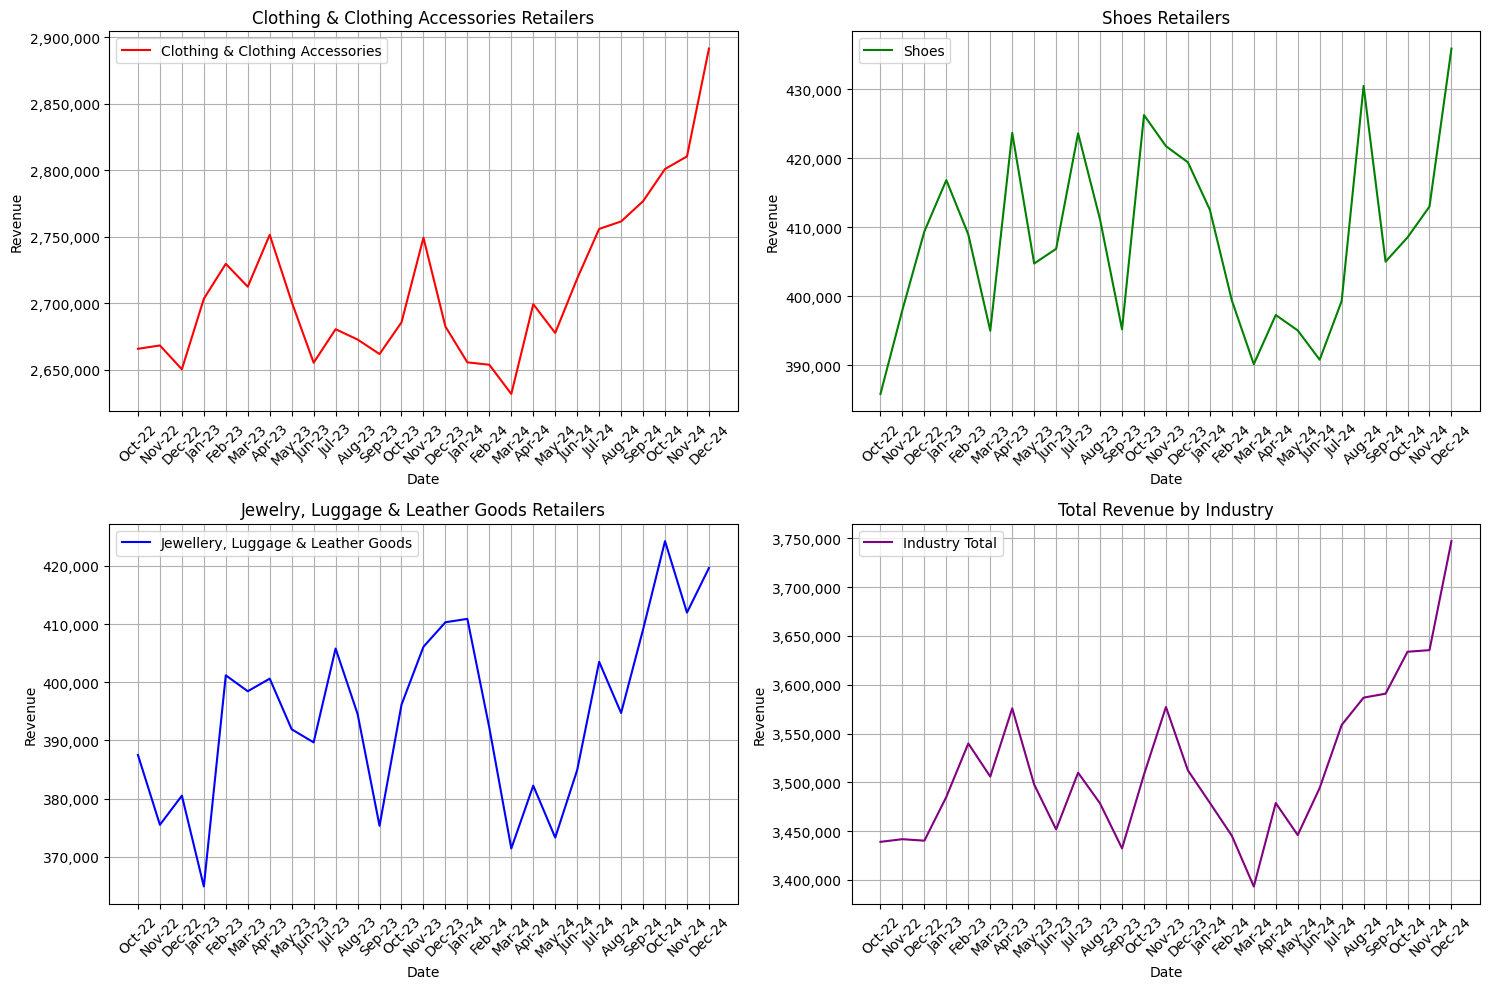

In [131]:
line_plot_1()

## 2) Most Impacted Sector
We want to determine the sector that was heavily impacted by COVID.
### Methodology
To determine the most impacted sector by COVID, we focus on revenue trends across multiple sectors over time, especially during the period when COVID restrictions were active and immediately after they were lifted. By comparing the peaks (highest revenue) and troughs (lowest revenue) for each sector, we can calculate the relative drop in sales. Then we use a line graph to visualize the percentage drop in revenue for the top 1 influenced sector. 

1) Revenue Drop Calculation: For each sector, we calculate the percentage drop between the highest (pre-COVID) and lowest (COVID period) revenue points.
2) Comparison: Based on calculations show the top 10 most affected sector that had the highest drop by percentage over COVID period. 
3) Highlight the top sector with the largest revenue drop, giving insights into which retail businesses struggled the most.

This approach helps us determine which sectors saw the greatest disruption during COVID and the speed of their recovery afterward.

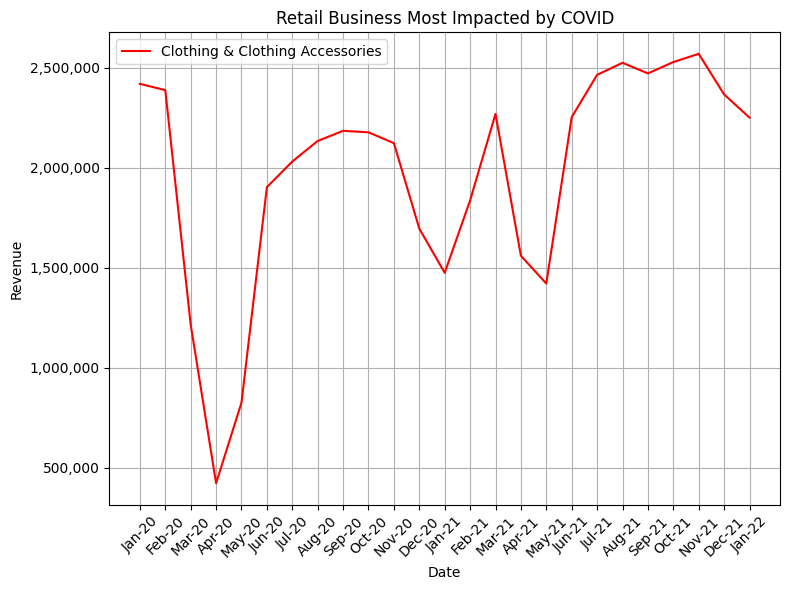

In [157]:
line_plot_2()

## 3) Best Time to Sell a Car
We want to determine the best time to sell a car. 
### Methodology
To identify the optimal time to sell a car, we need to understand when demand is at its peak. Typically, demand for automobiles is influenced by various factors, such as seasonal trends, consumer behavior, and economic conditions. For this analysis, we are focusing on the automobile retail sector. Our goal is to find the months when automobile sales are highest, signaling a high demand for cars, thus giving us an opportunity to sell a car at a better price.

1) Revenue Drop Calculation: We calculate the percentage drop between the highest revenue (pre-COVID) and the lowest revenue (during the COVID period). This will help us assess the impact of the COVID pandemic on the automobile retail industry and identify how quickly the industry recovered.
2) Comparison of Revenue Trends: By averaging the monthly revenues over five years (2019-2024), we can identify which months saw the highest average sales. High average sales indicate high demand, which is a good indicator of the best time to sell a car.
3) Highlighting the Most Affected Sector: After determining the revenue drops for each sector, we will identify the sector with the most significant revenue drop, providing insights into which businesses struggled the most during the pandemic. This helps contextualize the recovery trajectory and offers a comparative view of the automobile retail industry.Revenue Drop Calculation: For each sector, we calculate the percentage drop between the highest (pre-COVID) and lowest (COVID period) revenue points.

This approach helps us determine which time is the best to sell a car based on past data. 

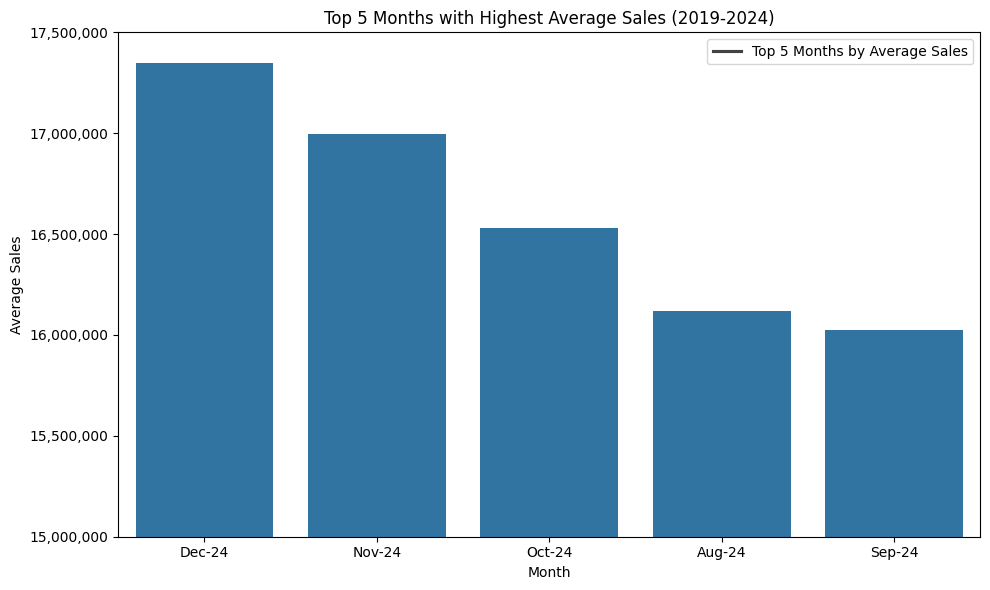

In [6]:
bar_plot()

#### Refrences
1) Statistic Canada. (Feb 24, 2025). Monthly retail trade sales by industry (x 1,000). Statistic Canada. Retrieved from:
https://www.statcan.gc.ca